In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Since our dataset is huge, we will use sample of size 40000

In [38]:
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv").sample(n=40000, random_state=42)
books = pd.read_csv("Books.csv")


C:\Users\adamp\AppData\Local\Temp\ipykernel_9276\807958495.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [39]:
pd.set_option('display.max_columns',10)

In [40]:
ratings

,User-ID,ISBN,Book-Rating
811996,197550,0586056092,0
395489,95359,0060916508,9
1087976,260865,0590620096,0
283523,67663,0142000221,0
85509,18082,0590582895,0
...,...,...,...
634011,153662,0385128800,0
785756,189855,0020519001,5
250163,56959,0671747096,0
244557,56271,0804111642,8


In [42]:
ratings.describe()

,User-ID,Book-Rating
count,40000.000000,40000.000000
mean,139566.768200,2.847650
std,80205.852639,3.842845
min,8.000000,0.000000
25%,69721.000000,0.000000
50%,138844.000000,0.000000
75%,209878.250000,7.000000
max,278854.000000,10.000000


(array([25003.,    56.,    99.,   192.,   282.,  1785.,  1297.,  2647.,
         3659.,  4980.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

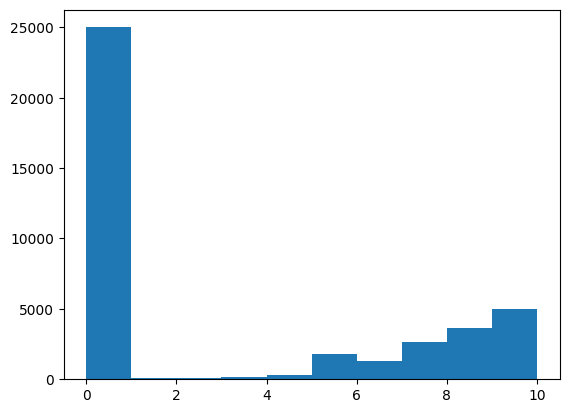

In [43]:
plt.hist(ratings["Book-Rating"])

In [44]:
print(ratings["ISBN"].nunique())

30136


First we will remove all the 0 ratings. There are some ISBN values in ratings, that are not in books dataset, we will also remove them.

In [132]:
ratings_filtered = ratings[ratings["Book-Rating"] != 0]
mask = ratings_filtered['ISBN'].isin(books['ISBN'])
ratings_filtered = ratings_filtered[mask]

,User-ID,ISBN,Book-Rating
78510,16795,0345339703,8
108917,25123,0345339703,10
802449,194803,0345339703,10
903802,219065,0345339703,8
111815,25981,0345339703,5


In [70]:
ratings_filtered.describe()

,User-ID,Book-Rating
count,13277.000000,13277.000000
mean,134644.375235,7.617383
std,80636.242304,1.821053
min,8.000000,1.000000
25%,64405.000000,7.000000
50%,130482.000000,8.000000
75%,205037.000000,9.000000
max,278854.000000,10.000000


In [47]:
ratings_filtered

,User-ID,ISBN,Book-Rating
395489,95359,0060916508,9
374715,90049,0380698498,5
100722,23619,0312278586,6
940831,227705,0425121631,7
148962,33603,0911104674,10
...,...,...,...
1126875,270339,0345439007,5
433851,103541,0451453573,10
785756,189855,0020519001,5
244557,56271,0804111642,8


In [135]:
ratings_filtered['ISBN'].nunique()

11033

In [143]:
selected_isbn = ratings_filtered['ISBN'].unique()
selected_books = books[books['ISBN'].isin(selected_isbn)]

In [144]:
selected_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
12,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...
18,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
...,...,...,...,...,...,...,...,...
271162,0114934274,Scotland Bc: An Introduction to the Prehistori...,Anna Ritchie,1988,Stationery Office Books,http://images.amazon.com/images/P/0114934274.0...,http://images.amazon.com/images/P/0114934274.0...,http://images.amazon.com/images/P/0114934274.0...
271274,1400303214,"Stranger Online (Todaysgirlsonly, 1)",Terry Brown,2003,Tommy Nelson,http://images.amazon.com/images/P/1400303214.0...,http://images.amazon.com/images/P/1400303214.0...,http://images.amazon.com/images/P/1400303214.0...
271278,1414048688,Professor Terwilliger and Tim Neptune I,Cal Patterson,2004,1stBooks Library,http://images.amazon.com/images/P/1414048688.0...,http://images.amazon.com/images/P/1414048688.0...,http://images.amazon.com/images/P/1414048688.0...
271280,1578567475,Hyperlinkz Book 1 : Digital Disaster (Hyperlinkz),ROBERT ELMER,2004,WaterBrook Press,http://images.amazon.com/images/P/1578567475.0...,http://images.amazon.com/images/P/1578567475.0...,http://images.amazon.com/images/P/1578567475.0...


Let's create the item-user matrix.

In [72]:
pivot_table = ratings_filtered.pivot_table(index="ISBN",columns="User-ID",values="Book-Rating").fillna(0)

In [73]:
len(pivot_table.index)

11033

In [74]:
user_matrix = pivot_table.to_numpy()
user_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Let's check for matrix sparsity. Collaborative filtering do NOT work well if data is too sparse.

In [148]:
sparsity = np.count_nonzero(user_matrix)/(np.shape(user_matrix)[0]*np.shape(user_matrix)[1])
sparsity

0.00015533623731876528

The dataset is really sparse, let's continue for now and later we might remove books that have been rated only few times and see if that improves our resulting model.


In [76]:
from sklearn.decomposition import TruncatedSVD

In [77]:
svd = TruncatedSVD(15)

result = svd.fit_transform(user_matrix)


In [78]:
result

array([[ 1.48667966e-11, -2.66652016e-11, -9.98013475e-09, ...,
        -1.11866999e-05, -8.94277335e-06, -1.41306013e-05],
       [ 2.19908437e-14, -1.62781192e-14, -1.02344575e-11, ...,
         5.44372045e-09,  7.04084150e-09, -1.16526601e-08],
       [ 1.66091972e-17, -6.08090218e-18, -1.27845648e-14, ...,
         1.55159135e-12,  1.59480437e-11,  2.25232378e-12],
       ...,
       [ 2.00881423e-15,  1.93937975e-16,  1.37072485e-13, ...,
         1.12276047e-09,  2.50746217e-09, -9.20108467e-10],
       [-7.23281122e-15, -2.42849399e-14,  1.39994973e-11, ...,
        -1.53309203e-08, -1.98658324e-08,  2.73471734e-08],
       [-1.45910848e-14,  3.47962923e-14, -5.11067324e-12, ...,
         1.80606751e-09,  2.36896924e-09,  6.34891089e-09]])

In [79]:
user_matrix_reconstructed = np.dot(result,svd.components_)

In [57]:
user_matrix_reconstructed

array([[-5.09463424e-17, -8.12344022e-14,  1.83145640e-14, ...,
        -4.07692650e-18, -1.02788235e-11,  2.90257971e-16],
       [ 2.80527910e-20,  2.46001801e-17, -9.42791250e-18, ...,
         3.29440102e-20,  1.18798445e-14,  6.64682359e-19],
       [-2.04271926e-22,  2.63909910e-16, -2.70529889e-17, ...,
         5.71573576e-20, -3.62046910e-14,  7.16851374e-19],
       ...,
       [-1.28019208e-25, -3.53935429e-21,  3.48200999e-22, ...,
        -3.45345852e-24, -1.98990965e-19, -7.35952490e-23],
       [ 8.25202748e-22, -4.15623689e-18,  4.30309027e-19, ...,
         6.40409533e-22,  1.15568374e-15,  2.23074314e-20],
       [-2.44349459e-20, -2.73229062e-17,  1.22661786e-17, ...,
        -2.04289189e-20,  4.08542771e-15, -1.86558227e-19]])

In [80]:
df_user_matrix = pd.DataFrame(data=user_matrix_reconstructed,index = pivot_table.index)
df_user_matrix

,0,1,2,3,4,...,7742,7743,7744,7745,7746
ISBN,,,,,,,,,,,
0001941941,1.376020e-18,-4.978111e-13,-1.946748e-14,-3.817650e-12,-1.737079e-12,...,8.753160e-14,-3.618800e-10,-3.273433e-17,3.879143e-11,-1.949322e-16
0002005018,6.004716e-20,-1.190426e-16,-2.607562e-17,-1.789529e-15,-3.210037e-17,...,8.065662e-17,-1.409923e-13,-5.239182e-20,3.155001e-14,1.629140e-18
0002163578,1.413342e-22,3.883327e-19,2.186020e-20,7.415321e-19,2.949247e-18,...,-2.673570e-20,9.340484e-17,-6.435679e-24,-2.277051e-18,4.781080e-22
0002165368,-1.406267e-13,-1.732132e-09,9.169788e-11,8.301927e-09,-1.403649e-08,...,6.592220e-10,4.329271e-07,-4.311873e-13,-2.588910e-07,-8.053441e-12
0002166828,3.190593e-18,2.024829e-14,5.447860e-16,1.981608e-13,-6.844362e-14,...,-6.909883e-16,3.295640e-12,-6.241430e-18,-2.758821e-12,-1.509287e-17
...,...,...,...,...,...,...,...,...,...,...,...
9879065271,6.829857e-19,4.361104e-14,-2.701472e-15,-2.505281e-13,2.421492e-13,...,-9.682806e-15,8.488693e-12,1.384683e-17,1.381027e-12,2.172536e-16
B0000523SY,2.304944e-18,-1.063787e-15,-5.881551e-16,-3.967367e-14,5.201178e-15,...,1.962783e-15,-4.445910e-12,-1.830063e-18,9.344769e-13,4.177649e-17
B00006H3BO,1.685765e-20,3.161105e-17,-1.324861e-18,-9.758268e-19,2.190590e-16,...,5.228864e-18,-2.850709e-16,-8.031375e-21,2.291551e-15,2.501368e-19


In [88]:
from sklearn.metrics.pairwise import cosine_similarity


#Funcion that computes cosine similarity of given book with each other in dataset. Returns list where each element is cosine similarity with given book and it's ISBN.
def similar(book):
    isbn = books.loc[books['Book-Title'] == book]['ISBN'].iloc[0]
    similarities = []
    vector = df_user_matrix.loc[isbn].values.reshape(1,-1)
    for index in df_user_matrix.index:
        similarities.append([cosine_similarity(vector,df_user_matrix.loc[index].values.reshape(1,-1))[0][0],index])
    
    return similarities
        

In [121]:
#This function takes similarity measure function, book and returns list of top5 similar books with it's ISBN.
def recommend(fun,book):
    arr = np.array(fun(book))
    indices_sorted = np.argsort(np.float_(arr[:,0]))
    top5 = arr[indices_sorted][-5:]
    predicted_books = [books[books['ISBN'] == isbn]['Book-Title'] for isbn in top5[:,1]]
    return predicted_books
    
    

In [119]:
prediction = recommend(similar,'Memoirs of a great Canadian detective: Incidents in the life of John Wilson Murray')

In [120]:
prediction

[110779    Mommie Dearest : Joan Crawford
 Name: Book-Title, dtype: object,
 73085    Factoring Humanity
 Name: Book-Title, dtype: object,
 10929    Tiger Eyes
 Name: Book-Title, dtype: object,
 53459    The Progress of Love
 Name: Book-Title, dtype: object,
 53469    Memoirs of a great Canadian detective: Inciden...
 Name: Book-Title, dtype: object]

In [145]:
another_pred = recommend(similar,'To Kill a Mockingbird')

In [146]:
another_pred

[23538    Last Exit to Brooklyn
 Name: Book-Title, dtype: object,
 29706    The Elements of Expression: Putting Thoughts i...
 Name: Book-Title, dtype: object,
 20393    The Talented Mr. Ripley (Vintage Crime/Black L...
 Name: Book-Title, dtype: object,
 2355    Murder on the Orient Express (Hercule Poirot M...
 Name: Book-Title, dtype: object,
 37    To Kill a Mockingbird
 Name: Book-Title, dtype: object]

Now we need to select scoring metric and perform some kind of hyperparameter selection. Hyper parameters might be different matrix factorization algorithms, parameters of these algorithms, similarity functions and any kind of data preparation. We might scale ratings to eliminate users rating bias, we might remove users/books that rated/have been rated only few times and so on...